In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/data/"
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
skincare = pd.read_csv(f"{DATA_PATH}아모레크롤링_스킨케어_완료.csv")
skincare

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...
...,...,...,...,...,...,...,...,...,...,...,...
112742,스킨케어,프리메라,모이스처 클렌징 티슈 300g,drea****,5,2020.01.11,40대,여성,복합성,모공,자극적이지 않고 순하게 화장을 지워주어 좋아요.
112743,스킨케어,프리메라,모이스처 클렌징 티슈 300g,kim4***,5,2022.05.11,50대 이상,여성,복합성,칙칙함,순하고 화장도 잘지워지고 기름지지않아서 좋아요 ~~^^
112744,스킨케어,프리메라,모이스처 클렌징 티슈 300g,hyej*****,4,2022.04.12,40대,여성,수분부족지성,탄력없음,클렌징티슈는 이것만 사용해요 자극 덜하고 향도 좋아요~
112745,스킨케어,프리메라,모이스처 클렌징 티슈 300g,sooh*****,4,2019.08.31,40대,여성,수분부족지성,모공,제 인생템 중 하나입니다 없으면 불안해져 쟁여놓고 쓴답니다~


In [4]:
makeup = pd.read_csv(f"{DATA_PATH}아모레크롤링_메이크업_완료.csv")
makeup

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,메이크업,헤라,블랙 쿠션 SPF34/PA++,clas********,5,2022.05.15,30대,여성,지성,칙칙함,신랑의 인생템이예요. 전에 체험단 이벤트로 27n1컬러를 처음 만났는데 21호 쓰는...
1,메이크업,헤라,블랙 쿠션 SPF34/PA++,drea*****,5,2022.02.06,50대 이상,여성,지성,트러블,명불허전 헤라 블랙쿠션!! 왜 입소문이 자자한지 써보면 압니다. 이번에 리뉴얼 되었...
2,메이크업,헤라,블랙 쿠션 SPF34/PA++,tlsd********,5,2022.10.10,30대,여성,복합성,민감성,민감여드름 복합성피부 30대여자입니다. 블랙쿠션은 이름만 많이들었지 구매한건 이번이...
3,메이크업,헤라,블랙 쿠션 SPF34/PA++,dbsd********,5,2021.05.11,20대,여성,복합성,민감성,사실 처음엔 가격때문에 살까말까 고민이 많았던 제품이었어요. 다들 좋다고는 하는데 ...
4,메이크업,헤라,블랙 쿠션 SPF34/PA++,mksa******,5,2022.01.15,40대,여성,건성,칙칙함,피부는 밝은편인데 악건성에 칙칙 노란끼 홍조 있어요 나이가 들어서 무조건 커버력이라...
...,...,...,...,...,...,...,...,...,...,...,...
37260,메이크업,세잔느,내추럴치크N 3.5g,ghkd*****,5,2019.05.07,30대,여성,수분부족지성,주름,사랑스런 라벤더핑크 우체국택배로 작은 상자로 왔어요. 상자를 뜯어보니 비닐에 싸여 ...
37261,메이크업,세잔느,내추럴치크N 3.5g,true*****,4,2019.05.06,40대,여성,수분부족지성,모공,여리여리한 발색 제 품의 설명이 한국어로 된건 비닐 포장 밖에 적혀있어요. 그러다 ...
37262,메이크업,세잔느,내추럴치크N 3.5g,kaec****,5,2019.05.02,30대,여성,수분부족지성,칙칙함,색상이 많이 진할까 걱정했는데 조심히 바르면 아주 이뻐요!!!
37263,메이크업,세잔느,내추럴치크N 3.5g,wjdg*******,4,2019.04.27,20대,여성,복합성,건조함,발색짱짱 뚜둥!ㅎㅎ 드디어 왔습니다 ㅎㅎ 두근두근 하늘아래 같은색은 없죠? 색이 영...


In [5]:
food = pd.read_csv(f"{DATA_PATH}뷰티푸드 별점.csv")
food

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,뷰티푸드,바이탈뷰티,메타그린 부스터샷 7일,mimi**,5,2023.08.24,30대,여성,건성,건조함,여름휴가철을 앞두고 몸매관리에 필요성을 느껴서 어디껄 살까 고민하다가 마침 전에 증...
1,뷰티푸드,바이탈뷰티,메타그린 부스터샷 7일,yooy****,5,2023.08.22,40대,여성,복합성,모공,아직 복용전 입니다. 메타그린 먹고 있어서 함께 사용하려고 구입 했습니다.
2,뷰티푸드,바이탈뷰티,메타그린 부스터샷 7일,n199**,5,2023.08.21,30대,여성,복합성,트러블,아무래도 가격이 있는 편이라 좀 부담스럽긴 하지만 원래 제품을 꾸준히 먹고 도움 받...
3,뷰티푸드,바이탈뷰티,메타그린 부스터샷 7일,n199**,4,2023.08.21,30대,여성,복합성,트러블,저는 운동이랑 식단 병행하면서 도움 받았어요. 유지어터라 그럴 수도 있지만 살을 빼...
4,뷰티푸드,바이탈뷰티,메타그린 부스터샷 7일,dlfw*****,4,2023.08.19,30대,여성,건성,건조함,먹은지 며칠 안돼서 효과는 잘 모르겠으나 먹기 간편해서 좋고 맛있네요ㅎㅎ
...,...,...,...,...,...,...,...,...,...,...,...
33057,뷰티푸드,바이탈뷰티,프로바이오틱스 골드,iamj***,5,2022.03.14,40대,남성,중성,건조함,[바이탈뷰티] [프리미엄 라인] 프로바이오 골드(30일) 프로바이오 골드 30일
33058,뷰티푸드,바이탈뷰티,프로바이오틱스 골드,daki**,5,2020.05.18,40대,여성,NaN,NaN,유산균 찾아보다가 알게된상품 인데 좋은듯 합니다.
33059,뷰티푸드,바이탈뷰티,프로바이오틱스 골드,grea*******,5,2019.09.06,30대,남성,NaN,NaN,항상 즐거운 마음으로 먹고 있습니다. 인생템 짱입니다!!
33060,뷰티푸드,바이탈뷰티,프로바이오틱스 골드,ylov****,4,2019.09.06,40대,여성,NaN,NaN,제품 바뀌고나서는 증정품먹어보고 구매합니다.먹고 호과좋왔음 좋겠네요.


In [6]:
perfume = pd.read_csv(f"{DATA_PATH}향수 별점.csv")
perfume

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,향수,에스쁘아,케익 프레그런스 2.5g,dmswls89,5,2022.10.01,30대,여성,NaN,NaN,구매시점이었던 여름부터 아주 잘 사용하고 있습니다! 향은 에스쁘아 특유의 꽃향기 같...
1,향수,에스쁘아,케익 프레그런스 2.5g,dmswls89,5,2022.12.23,30대,여성,NaN,NaN,외출할 때마다 항상 사용하는 고체향수입니다! 한 달 전 재구매한 것은 아직 안뜯었고...
2,향수,에스쁘아,케익 프레그런스 2.5g,dmswls89,5,2022.08.25,30대,여성,NaN,NaN,"예전에, 정말 예~전에 에스쁘아 고체 향수 써보고 오랜만에 구입해봤습니다. 에스쁘아..."
3,향수,에스쁘아,케익 프레그런스 2.5g,Good******,5,2022.06.15,50대 이상,여성,NaN,NaN,제품을받고 제일먼저 매우 좋다는 탄성이 나오게 됩니다.조금도 아쉬움이 없는 예쁘고 ...
4,향수,에스쁘아,케익 프레그런스 2.5g,shin******,5,2022.11.05,50대 이상,여성,NaN,NaN,저렇게 이렇게 노력하고 또 노력해서 모으고 모은 뷰티포인트와 기프트카드로 수많은 제...
...,...,...,...,...,...,...,...,...,...,...,...
2860,향수,구딸,스 수와 우 자메 EDP,ymon*,5,2021.06.30,30대,여성,NaN,NaN,전형적인 장미향이에요. 요즘 유행하는 풀냄새까지 섞인 장미향도 아니고 로스폼퐁처럼 ...
2861,향수,구딸,스 수와 우 자메 EDP,empt*****,5,2022.12.14,30대,여성,NaN,NaN,"장미향은 처음인데 매우 마음에 듭니다 잎, 줄기의 풀 냄새가 섞이지 않은 장미꽃잎만..."
2862,향수,구딸,스 수와 우 자메 EDP,나나낭니,5,2022.09.14,30대,여성,NaN,NaN,장미향은 많은데 달달하지 않은 향 찾고 있었거든요. 디퓨저로 써도 좋을듯한 향이...
2863,향수,구딸,스 수와 우 자메 EDP,saga****,5,2022.06.27,30대,여성,NaN,NaN,"머스키한 센슈얼함이 있어, 선선한 계절에 잘 어울려요. 따끈한 날씨에 뿌리면 술에 ..."


In [7]:
thing = pd.read_csv(f"{DATA_PATH}소품도구 별점.csv")
thing

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,소품도구,헤라,블랙 쿠션 제로-비티 핏 퍼프 2EA,ogy4***,2,2021-10-29,20대,여성,NaN,NaN,-디자인 *5점 만점 기준* -디자인 : 퍼프 위의 가죽 느낌으로 고급스러움과 ...
1,소품도구,헤라,블랙 쿠션 제로-비티 핏 퍼프 2EA,bjhd**,5,2022-02-17,30대,남성,NaN,NaN,좋아요! 최고에요!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
2,소품도구,헤라,블랙 쿠션 제로-비티 핏 퍼프 2EA,kitt*****,5,2022-07-19,20대,여성,NaN,NaN,퍼프는 빨아서 사용하는 것도 찝찝하고 블랙쿠션에는 블랙쿠션 퍼프가 딱이라고 생각해서...
3,소품도구,헤라,블랙 쿠션 제로-비티 핏 퍼프 2EA,sjji****,5,2021-08-14,50대 이상,여성,NaN,NaN,퍼프가 발림성이 정말로 쫀쫀해요 쫀쫀 ! 두 개의 퍼프가 비닐과 pvc백에 이중 포...
4,소품도구,헤라,블랙 쿠션 제로-비티 핏 퍼프 2EA,wlsg********,5,2022-07-20,30대,여성,NaN,NaN,"밀착력에 짱 ! 뭉침없이 발라지는 퍼프, 저는 위생상 2주일에 한번씩 직접 퍼프를 ..."
...,...,...,...,...,...,...,...,...,...,...,...
17837,소품도구,피카소,103A 파우더,suy*,5,2019-08-07,20대,여성,NaN,NaN,명불허전이에요~ 파우더나 블러셔 용도로 매우 잘쓰고 있어요!
17838,소품도구,피카소,103A 파우더,yyou****,5,2019-06-25,20대,여성,NaN,NaN,부드럽고 파우더 바르기 좋아요! 다른 브러쉬로 바르면 파우더가 조금 떠서 피카소 브...
17839,소품도구,피카소,103A 파우더,amil****,5,2019-05-18,40대,여성,NaN,NaN,피카소브러쉬 너무좋아요 계속사게되요 모질도 너무 부드럽고 ~ 이번에 행사해서 할인...
17840,소품도구,피카소,103A 파우더,vbgu*****,4,2019-04-30,30대,여성,NaN,NaN,가격은 좀 비싸지만 생각보다 괜찮은것 같아요 배송은 하루만에 받았구요 보호케이스가 ...


In [8]:
frames = [skincare, makeup, food, perfume, thing]
df = pd.concat(frames, ignore_index=True)
df

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...
...,...,...,...,...,...,...,...,...,...,...,...
203776,소품도구,피카소,103A 파우더,suy*,5,2019-08-07,20대,여성,NaN,NaN,명불허전이에요~ 파우더나 블러셔 용도로 매우 잘쓰고 있어요!
203777,소품도구,피카소,103A 파우더,yyou****,5,2019-06-25,20대,여성,NaN,NaN,부드럽고 파우더 바르기 좋아요! 다른 브러쉬로 바르면 파우더가 조금 떠서 피카소 브...
203778,소품도구,피카소,103A 파우더,amil****,5,2019-05-18,40대,여성,NaN,NaN,피카소브러쉬 너무좋아요 계속사게되요 모질도 너무 부드럽고 ~ 이번에 행사해서 할인...
203779,소품도구,피카소,103A 파우더,vbgu*****,4,2019-04-30,30대,여성,NaN,NaN,가격은 좀 비싸지만 생각보다 괜찮은것 같아요 배송은 하루만에 받았구요 보호케이스가 ...


In [9]:
teen_reviews = df[df['나이'] == '10대']
teen_reviews['상품명'].mode().values[0]

'아이래시 컬러'

In [10]:
makeup['상품명'].mode().values[0]

'브로우 디자이너 오토펜슬'

In [ ]:
food['상품명'].mode().values[0]

'명작수'

In [ ]:
perfume['상품명'].mode().values[0]

'지일 오 데 퍼퓸'

In [ ]:
thing['상품명'].mode().values[0]

'아이래시 컬러'

In [11]:
from datetime import datetime, timedelta

In [10]:
#최근 1년 기준 많이 리뷰가 달린 상품
df['작성날짜'] = pd.to_datetime(df['리뷰작성날짜'])

In [11]:
current_date = datetime.now()

In [16]:
volcano_df = df[df['상품명']=='화산송이 모공 바하 클렌징 폼 150g']

In [18]:
recent_reviews = volcano_df[
    (current_date - pd.to_datetime(volcano_df['리뷰작성날짜'])).dt.days <= 90
]
count_recent_reviews = len(recent_reviews)

In [20]:
older_reviews = volcano_df[
    ((current_date - pd.to_datetime(volcano_df['리뷰작성날짜'])).dt.days > 90) &
    ((current_date - pd.to_datetime(volcano_df['리뷰작성날짜'])).dt.days <= 180)
]
count_older_reviews = len(older_reviews)

In [21]:
print(f"최근 3개월 이내 리뷰 수: {count_recent_reviews}")
print(f"3~6개월 전 리뷰 수: {count_older_reviews}")

최근 3개월 이내 리뷰 수: 95
3~6개월 전 리뷰 수: 85


In [12]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [13]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [14]:
def compare_reviews(df):
  while True:
        title = input("상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): ")
        if title.lower() in ['q', 'quit']:
            print("챗봇을 종료합니다.")
            break
        # 여러 키워드에 대한 처리
        keywords = title.split()
        condition = lambda x: all(keyword.lower() in x.lower() for keyword in keywords)
        # 중복 제거를 위해 unique() 사용
        matching_titles = [t for t in df['상품명'].unique().tolist() if condition(t)]
        if not matching_titles:
            print("해당 상품이 없습니다.")
            continue
        print("일치하는 상품명 목록:")
        for idx, matching_title in enumerate(matching_titles, start=1):
            print(f"{idx}. {matching_title}")
        # 사용자가 상품을 선택하도록 함
        selected_idx = int(input("상품을 선택하세요 (번호 입력): "))
        selected_title = matching_titles[selected_idx - 1]
        # 선택한 상품의 리뷰 가져오기
        reviews = df[df['상품명'] == selected_title]
        #reviews_text = ' '.join(reviews)
        reviews['리뷰작성날짜'] = pd.to_datetime(reviews['리뷰작성날짜'])

        # 최근 1년 동안의 리뷰만 필터링
        one_year_ago = pd.Timestamp.now() - pd.DateOffset(years=1)
        recent_reviews = reviews[reviews['리뷰작성날짜'] > one_year_ago]

        # 리뷰 작성 날짜별로 리뷰 수 계산
        review_trend = recent_reviews.groupby(recent_reviews['리뷰작성날짜'].dt.to_period("M")).size().reset_index(name='리뷰수')
        review_trend['리뷰작성날짜'] = review_trend['리뷰작성날짜'].dt.to_timestamp()

        # 그래프로 표현
        plt.figure(figsize=(10, 6))
        plt.plot(review_trend['리뷰작성날짜'], review_trend['리뷰수'], marker='o')
        plt.title(f'{selected_title} - 최근 1년 리뷰 동향')
        plt.xlabel('리뷰 작성 날짜')
        plt.ylabel('리뷰 수')
        plt.grid(True)
        plt.show(block=False)

상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): 화산송이
일치하는 상품명 목록:
1. 화산송이 모공 바하 클렌징 폼 150g
2. 수퍼 화산송이 모공 마스크
3. 화산송이 모공 바하 클렌징폼  250g
상품을 선택하세요 (번호 입력): 3


<ipython-input-14-59f0a56f8021>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['리뷰작성날짜'] = pd.to_datetime(reviews['리뷰작성날짜'])


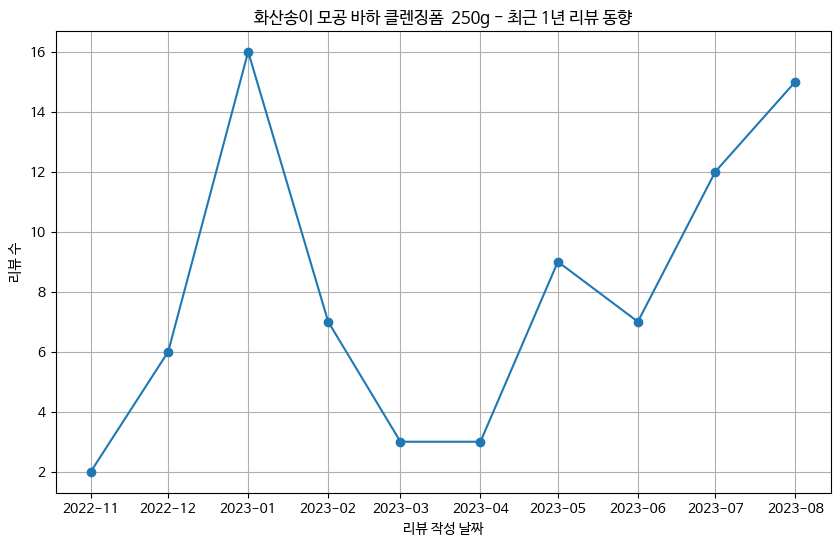

상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): q
챗봇을 종료합니다.


In [16]:
compare_reviews(df)

In [17]:
# 사용자 특성
def character_reviews(df):
  while True:
        title = input("상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): ")
        if title.lower() in ['q', 'quit']:
            print("챗봇을 종료합니다.")
            break
        # 여러 키워드에 대한 처리
        keywords = title.split()
        condition = lambda x: all(keyword.lower() in x.lower() for keyword in keywords)
        # 중복 제거를 위해 unique() 사용
        matching_titles = [t for t in df['상품명'].unique().tolist() if condition(t)]
        if not matching_titles:
            print("해당 상품이 없습니다.")
            continue
        print("일치하는 상품명 목록:")
        for idx, matching_title in enumerate(matching_titles, start=1):
            print(f"{idx}. {matching_title}")
        # 사용자가 상품을 선택하도록 함
        selected_idx = int(input("상품을 선택하세요 (번호 입력): "))
        selected_title = matching_titles[selected_idx - 1]
        # 선택한 상품의 리뷰 가져오기
        reviews = df[df['상품명'] == selected_title]
        age = reviews['나이'].mode().values[0]
        types = reviews['피부타입'].mode().values[0]
        trouble = reviews['피부트러블'].mode().values[0]
        print("이 제품은 "+age+", "+types+"이면서 "+trouble+" 고민을 가진 사람들이 많이 쓰는 제품입니다.")

In [18]:
character_reviews(df)

상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): 시카
일치하는 상품명 목록:
1. 에이시카 365 흔적 진정 세럼
2. 에이시카 365 소프트 진정 팩 패드 60매
3. 에이시카 365 수분 진정 결 토너
4. 레티놀 시카 흔적 앰플
5. 레티놀 시카 앰플 포커싱 패치 1개입 9매
6. 에이시카 365 수분 진정 크림
7. 시카 슬리핑 마스크
8. 퓨어 핏 시카 약산성 클렌징 패드 100매
9. 마일드 시카 무기 자차 선크림 SPF50+/PA++++
10. 비자 시카 밤 EX 대용량
11. 워터 스플래쉬 프레쉬 시카 선크림 SPF50+/PA++++
12. 순정 판텐소사이드™ 5 시카 밤
13. 에이시카 365패드 60매 100ml * 2
상품을 선택하세요 (번호 입력): 1
이 제품은 30대, 복합성이면서 트러블 고민을 가진 사람들이 많이 쓰는 제품입니다.
상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): q
챗봇을 종료합니다.


In [19]:
from datetime import datetime, timedelta

def comparing_reviews(df):
    while True:
        title = input("상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): ")
        if title.lower() in ['q', 'quit']:
            print("챗봇을 종료합니다.")
            break
        # 여러 키워드에 대한 처리
        keywords = title.split()
        condition = lambda x: all(keyword.lower() in x.lower() for keyword in keywords)
        # 중복 제거를 위해 unique() 사용
        matching_titles = [t for t in df['상품명'].unique().tolist() if condition(t)]
        if not matching_titles:
            print("해당 상품이 없습니다.")
            continue
        print("일치하는 상품명 목록:")
        for idx, matching_title in enumerate(matching_titles, start=1):
            print(f"{idx}. {matching_title}")
        # 사용자가 상품을 선택하도록 함
        selected_idx = int(input("상품을 선택하세요 (번호 입력): "))
        selected_title = matching_titles[selected_idx - 1]
        # 선택한 상품의 리뷰 가져오기
        reviews = df[df['상품명'] == selected_title]
        df.loc[reviews.index, '리뷰작성날짜'] = pd.to_datetime(reviews['리뷰작성날짜'])
        current_date = datetime.now()
        recent_reviews = reviews[
            (current_date - pd.to_datetime(reviews['리뷰작성날짜'])).dt.days <= 90
        ]
        count_recent_reviews = len(recent_reviews)
        older_reviews = reviews[
            ((current_date - pd.to_datetime(reviews['리뷰작성날짜'])).dt.days > 90) &
            ((current_date - pd.to_datetime(reviews['리뷰작성날짜'])).dt.days <= 180)
        ]
        count_older_reviews = len(older_reviews)
        if count_older_reviews - count_recent_reviews < -20:
            print("최근 인기 상승 상품입니다.")
        elif count_recent_reviews - count_older_reviews > 20:
            print("최근 인기 하락 상품입니다.")

In [20]:
comparing_reviews(df)

상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): 화산송이
일치하는 상품명 목록:
1. 화산송이 모공 바하 클렌징 폼 150g
2. 수퍼 화산송이 모공 마스크
3. 화산송이 모공 바하 클렌징폼  250g
상품을 선택하세요 (번호 입력): 2
최근 인기 상승 상품입니다.
상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): q
챗봇을 종료합니다.


In [21]:
#합치기
def total_reviews(df):
  while True:
        title = input("상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): ")
        if title.lower() in ['q', 'quit']:
            print("챗봇을 종료합니다.")
            break
        # 여러 키워드에 대한 처리
        keywords = title.split()
        condition = lambda x: all(keyword.lower() in x.lower() for keyword in keywords)
        # 중복 제거를 위해 unique() 사용
        matching_titles = [t for t in df['상품명'].unique().tolist() if condition(t)]
        if not matching_titles:
            print("해당 상품이 없습니다.")
            continue
        print("일치하는 상품명 목록:")
        for idx, matching_title in enumerate(matching_titles, start=1):
            print(f"{idx}. {matching_title}")
        # 사용자가 상품을 선택하도록 함
        selected_idx = int(input("상품을 선택하세요 (번호 입력): "))
        selected_title = matching_titles[selected_idx - 1]
        # 선택한 상품의 리뷰 가져오기
        reviews = df[df['상품명'] == selected_title]
        age = reviews['나이'].mode().values[0]
        types = reviews['피부타입'].mode().values[0]
        trouble = reviews['피부트러블'].mode().values[0]

        reviews['리뷰작성날짜'] = pd.to_datetime(reviews['리뷰작성날짜'], format='%Y-%m-%d', errors='coerce')
        current_date = datetime.now()
        recent_reviews = reviews[
            (current_date - pd.to_datetime(reviews['리뷰작성날짜'])).dt.days <= 90
        ]
        count_recent_reviews = len(recent_reviews)
        older_reviews = reviews[
            ((current_date - pd.to_datetime(reviews['리뷰작성날짜'])).dt.days > 90) &
            ((current_date - pd.to_datetime(reviews['리뷰작성날짜'])).dt.days <= 180)
        ]
        count_older_reviews = len(older_reviews)

        if count_older_reviews - count_recent_reviews < -20:
            print("최근 인기 상승 상품입니다.")
        elif count_recent_reviews - count_older_reviews > 20:
            print("최근 인기 하락 상품입니다.")

        print("이 제품은 "+age+", "+types+"이면서 "+trouble+" 고민을 가진 사람들이 많이 쓰는 제품입니다.")

        one_year_ago = pd.Timestamp.now() - pd.DateOffset(years=1)
        recent_reviews = reviews[reviews['리뷰작성날짜'] > one_year_ago]

        # 리뷰 작성 날짜별로 리뷰 수 계산
        review_trend = recent_reviews.groupby(recent_reviews['리뷰작성날짜'].dt.to_period("M")).size().reset_index(name='리뷰수')
        review_trend['리뷰작성날짜'] = review_trend['리뷰작성날짜'].dt.to_timestamp()

        # 그래프로 표현
        plt.figure(figsize=(10, 6))
        plt.plot(review_trend['리뷰작성날짜'], review_trend['리뷰수'], marker='o')
        plt.title(f'{selected_title} - 최근 1년 리뷰 동향')
        plt.xlabel('리뷰 작성 날짜')
        plt.ylabel('리뷰 수')
        plt.grid(True)
        plt.show(block=False)

상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): 화산송이
일치하는 상품명 목록:
1. 화산송이 모공 바하 클렌징 폼 150g
2. 수퍼 화산송이 모공 마스크
3. 화산송이 모공 바하 클렌징폼  250g
상품을 선택하세요 (번호 입력): 2


<ipython-input-21-fe5a7bd9ce97>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['리뷰작성날짜'] = pd.to_datetime(reviews['리뷰작성날짜'], format='%Y-%m-%d', errors='coerce')


최근 인기 상승 상품입니다.
이 제품은 30대, 복합성이면서 모공 고민을 가진 사람들이 많이 쓰는 제품입니다.


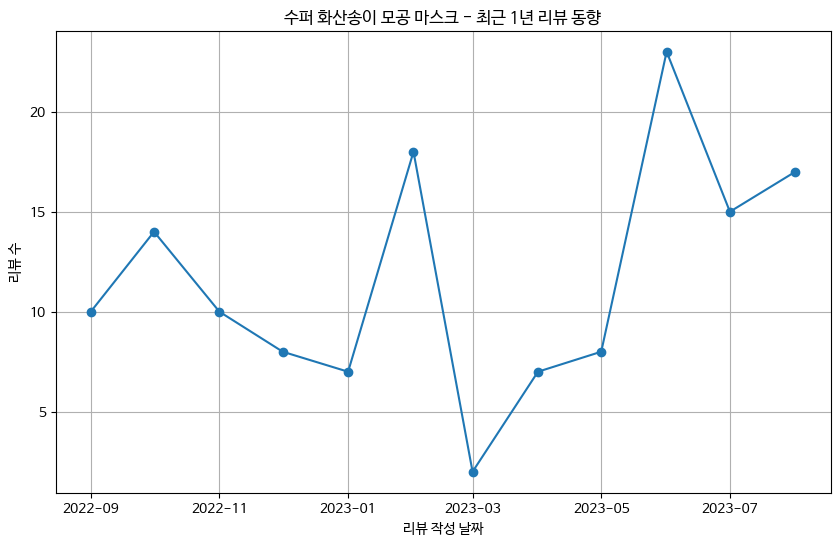

상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): q
챗봇을 종료합니다.


In [22]:
total_reviews(df)

In [23]:
#긍부정분석
#https://wikidocs.net/94600
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 32.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 5.3 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1231 sha256=c1b31a5780e8432dc8ea8a1e97714072ca3c48fb5b7de2615a31d8c9a9a88e45
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1172k      0  0:00:01  0:00:01 --:--:-- 1172k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/ex

In [24]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
df['리뷰'] = df['리뷰'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['리뷰'].replace('', np.nan, inplace=True)
print(df.isnull().sum())

<ipython-input-27-8e63dbcb6b91>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['리뷰'] = df['리뷰'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


상품분류          0
브랜드명          0
상품명           0
사용자 이름        0
별점            0
리뷰작성날짜        0
나이            0
성별            0
피부타입      41106
피부트러블     41639
리뷰           48
dtype: int64


In [28]:
mecab = Mecab()

In [ ]:
trouble_df = df[df['피부트러블']=='트러블']
trouble_df['상품명'].mode().values[0]

'에이시카 365 흔적 진정 세럼'

In [ ]:
dry_df = df[df['피부트러블']=='건조함']
dry_df['상품명'].mode().values[0]

'알파인베리 워터리 크림'

In [ ]:
wrinkle_df = df[df['피부트러블']=='주름']
wrinkle_df['상품명'].mode().values[0]

'퍼펙트리뉴 유스 레티놀 프로'

In [ ]:
sensitive_df = df[df['피부트러블']=='민감성']
sensitive_df['상품명'].mode().values[0]

'알파인베리 워터리 크림'

In [ ]:
darkness_df = df[df['피부트러블']=='칙칙함']
darkness_df['상품명'].mode().values[0]

'달빛유자C 세럼'

In [ ]:
df_student = df[df['나이']=='10대']
df_student['상품명'].mode().values[0]

'아이래시 컬러'

In [ ]:
skincare_df = df[df['상품분류'] == '스킨케어']
skincare_df['상품명'].mode().values[0]